# Import Libraries

In [13]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings(action='ignore')

# Import NLTK and download required resources
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize, sent_tokenize 
from nltk.stem import LancasterStemmer, WordNetLemmatizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Import other libraries
import re
import string
import unicodedata
import contractions
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import wordcloud
from wordcloud import STOPWORDS, WordCloud
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import (
    recall_score,
    accuracy_score,
    confusion_matrix,
    classification_report,
    f1_score,
    precision_score,
    precision_recall_fscore_support
)

# Set options for displaying data
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)


[nltk_data] Downloading package stopwords to

[nltk_data]     C:\Users\moaaz\AppData\Roaming\nltk_data...

[nltk_data]   Package stopwords is already up-to-date!

[nltk_data] Downloading package punkt to

[nltk_data]     C:\Users\moaaz\AppData\Roaming\nltk_data...

[nltk_data]   Package punkt is already up-to-date!

[nltk_data] Downloading package wordnet to

[nltk_data]     C:\Users\moaaz\AppData\Roaming\nltk_data...

[nltk_data]   Package wordnet is already up-to-date!


# Read the data

In [14]:
df = pd.read_csv('Tweets.csv')
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [15]:
texts = [[word.lower() for word in text.split()] for text in df]

In [16]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 14640 entries, 0 to 14639

Data columns (total 15 columns):

 #   Column                        Non-Null Count  Dtype  

---  ------                        --------------  -----  

 0   tweet_id                      14640 non-null  int64  

 1   airline_sentiment             14640 non-null  object 

 2   airline_sentiment_confidence  14640 non-null  float64

 3   negativereason                9178 non-null   object 

 4   negativereason_confidence     10522 non-null  float64

 5   airline                       14640 non-null  object 

 6   airline_sentiment_gold        40 non-null     object 

 7   name                          14640 non-null  object 

 8   negativereason_gold           32 non-null     object 

 9   retweet_count                 14640 non-null  int64  

 10  text                          14640 non-null  object 

 11  tweet_coord                   1019 non-null   object 

 12  tweet_created                 14640 non-nul

# Observations:
There are 15 columns in the dataset. Half of the columns have null values. Considering both dependent and independent variables not having any null values, we will not do any null value processing. Most columns in the dataset are of object type. airline_sentiment is our dependent / target variable. text column is our independent variable that we will use for analysis. All other columns will be dropped at a later stage.

In [3]:
df.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

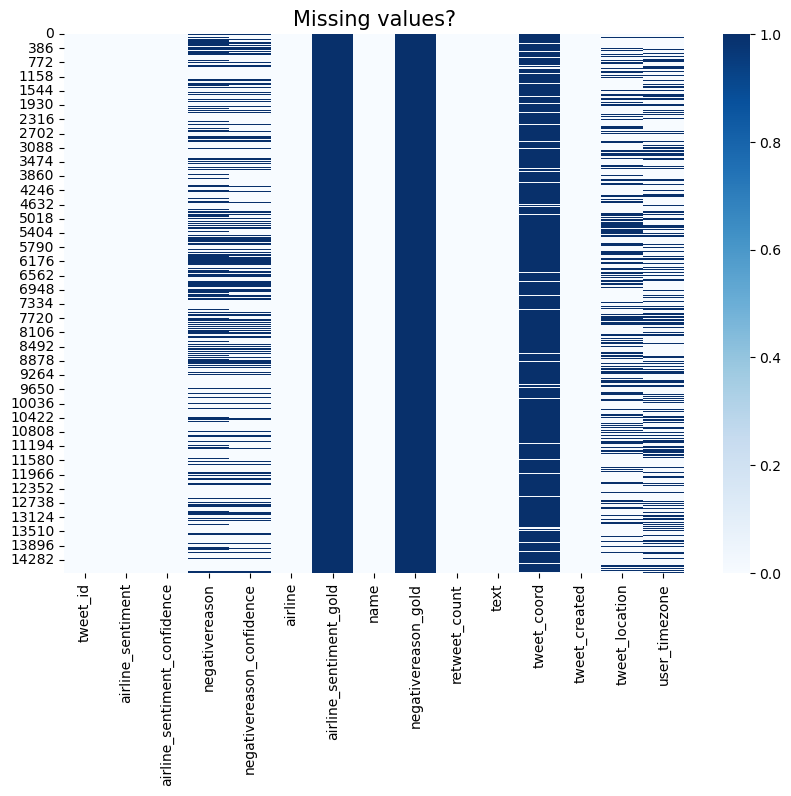

In [19]:
#Visualization of missing value using heatmap
plt.figure(figsize=(10,7))
sns.heatmap(df.isnull(), cmap = "Blues")                       
plt.title("Missing values?", fontsize = 15)
plt.show()

In [20]:
print("Percentage null or na values in df")
((df.isnull() | df.isna()).sum() * 100 / df.index.size).round(2)

Percentage null or na values in df


tweet_id                         0.00
airline_sentiment                0.00
airline_sentiment_confidence     0.00
negativereason                  37.31
negativereason_confidence       28.13
airline                          0.00
airline_sentiment_gold          99.73
name                             0.00
negativereason_gold             99.78
retweet_count                    0.00
text                             0.00
tweet_coord                     93.04
tweet_created                    0.00
tweet_location                  32.33
user_timezone                   32.92
dtype: float64

#### airline_sentiment_gold, negativereason_gold have more than 99% missing data And tweet_coord have nearly 93% missing data. It will be better to delete these columns as they will not provide any constructive information

In [22]:
df.drop(["tweet_coord", "airline_sentiment_gold", "negativereason_gold"], axis=1, inplace=True)

In [23]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [25]:
freq = df.groupby("negativereason").size()

In [26]:
df.duplicated().sum()

39

In [27]:
# Dropping duplicates
df.drop_duplicates(inplace = True)

In [28]:
df.duplicated().sum()

0

In [30]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tweet_id,14601.0,5.692156e+17,7.782706e+14,5.675883e+17,5.685581e+17,5.694720e+17,5.698884e+17,5.703106e+17
airline_sentiment_confidence,14601.0,8.999022e-01,1.629654e-01,3.350000e-01,6.923000e-01,1.000000e+00,1.000000e+00,1.000000e+00
negativereason_confidence,10501.0,6.375749e-01,3.303735e-01,0.000000e+00,3.605000e-01,6.705000e-01,1.000000e+00,1.000000e+00
retweet_count,14601.0,8.280255e-02,7.467231e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.400000e+01


# EDA

In [31]:
df.nunique()

tweet_id                        14485
airline_sentiment                   3
airline_sentiment_confidence     1023
negativereason                     10
negativereason_confidence        1410
airline                             6
name                             7701
retweet_count                      18
text                            14427
tweet_created                   14247
tweet_location                   3081
user_timezone                      85
dtype: int64

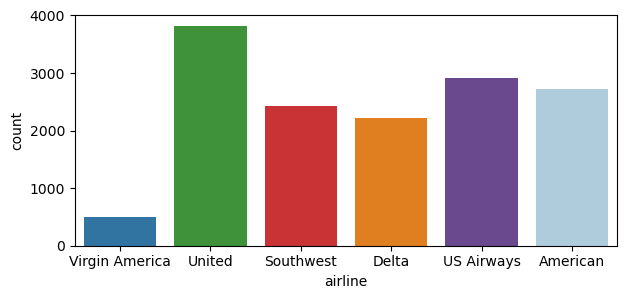

In [32]:
# Checking the distribution of airlines
plt.figure(figsize=(7,3))
sns.countplot(data=df,x='airline', palette=['#1f78b4', '#33a02c', '#e31a1c', '#ff7f00', '#6a3d9a', '#a6cee3'])
plt.show()

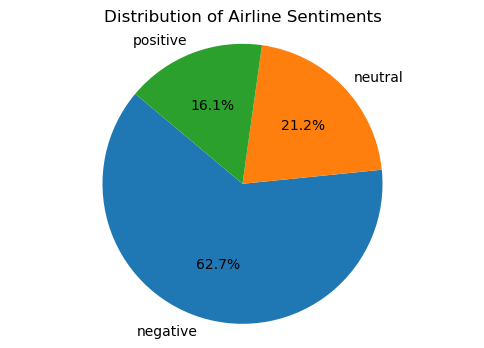

In [33]:
# Visualize the distribution of airline sentiments using a pie chart
sentiment_counts = df['airline_sentiment'].value_counts()
plt.figure(figsize=(6, 4))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Airline Sentiments')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

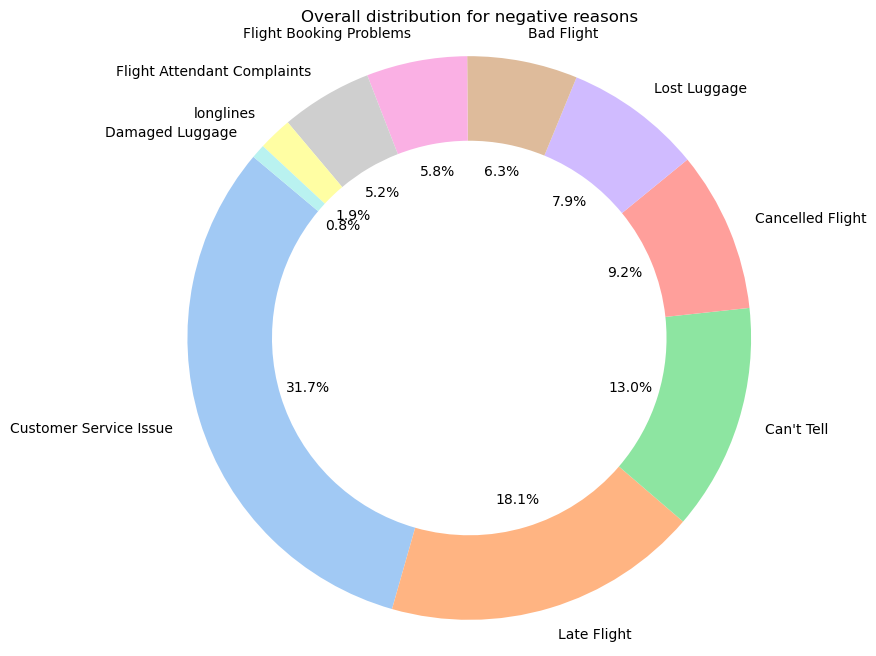

In [34]:
# Calculate the value counts for each negative reason
value_counts = df['negativereason'].value_counts()

# Create a donut-like pie chart using matplotlib and seaborn
plt.figure(figsize=(8, 8))
labels = value_counts.index
values = value_counts.values
colors = sns.color_palette('pastel')[0:len(labels)]  # Use pastel colors for the chart
plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.3))
plt.title('Overall distribution for negative reasons')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is drawn as a circle.
plt.show()

### Data clearing and preprocessing of Text

In [35]:
# Select only the necessary columns for sentiment analysis
df = df[['airline_sentiment', 'text']].copy()

In [36]:
df

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...
...,...,...
14635,positive,@AmericanAir thank you we got on a different f...
14636,negative,@AmericanAir leaving over 20 minutes Late Flig...
14637,neutral,@AmericanAir Please bring American Airlines to...
14638,negative,"@AmericanAir you have my money, you change my ..."


In [38]:
X = df["text"]
y = df["airline_sentiment"]

In [40]:
X

0                      @VirginAmerica What @dhepburn said.
1        @VirginAmerica plus you've added commercials t...
2        @VirginAmerica I didn't today... Must mean I n...
3        @VirginAmerica it's really aggressive to blast...
4        @VirginAmerica and it's a really big bad thing...
                               ...                        
14635    @AmericanAir thank you we got on a different f...
14636    @AmericanAir leaving over 20 minutes Late Flig...
14637    @AmericanAir Please bring American Airlines to...
14638    @AmericanAir you have my money, you change my ...
14639    @AmericanAir we have 8 ppl so we need 2 know h...
Name: text, Length: 14601, dtype: object

In [41]:
y

0         neutral
1        positive
2         neutral
3        negative
4        negative
           ...   
14635    positive
14636    negative
14637     neutral
14638    negative
14639     neutral
Name: airline_sentiment, Length: 14601, dtype: object

# Model Training

In [42]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [43]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(11680,) (2921,) (11680,) (2921,)


In [44]:
# Create a TF-IDF vectorizer with English stop words removal for text feature extraction.
tfidf = TfidfVectorizer(stop_words="english")

In [45]:
tfidf.fit(X_train)

TfidfVectorizer(stop_words='english')

In [46]:
print(tfidf.get_feature_names_out())

['00' '000' '000114' ... 'zv2pt6trk9' 'zv6cfpohl5' 'zvfmxnuelj']


In [47]:
print(tfidf.vocabulary_)

{'americanair': 1935, 'boarded': 2689, 'flight': 5211, '2334': 504, '30am': 671, '11': 99, '40': 825, 'sitting': 10557, 'runway': 10091, 'lots': 7411, 'fun': 5498, 'united': 12078, 'sent': 10352, 'hayden': 5973, 'steamboat': 10923, 'hdn': 5980, 'denver': 4088, 'hoping': 6182, '2396': 512, 'cancelled': 3009, 'flightled': 5240, 'tonight': 11609, 'usairways': 12220, 'ticket': 11506, 'counter': 3740, 'people': 8866, 'helping': 6034, 'just': 6879, 'want': 12492, 'charge': 3194, 'money': 7927, 'horrible': 6189, 'day': 3976, '132': 178, 'characters': 3193, 'does': 4371, 'cover': 3764, 'reasons': 9579, 'afraid': 1766, '30': 655, '1750': 304, 'trying': 11772, 'tel': 11335, 'aviv': 2289, 'right': 9947, 'cruel': 3834, '350pm': 726, 'hours': 6220, 'hold': 6124, 'customer': 3884, 'service': 10373, 'answering': 2020, 'ridiculous': 9942, 'seat': 10288, '10d': 86, 'vegas': 12317, 'chicago': 3252, 'left': 7168, 'folder': 5332, 'looks': 7388, 'important': 6392, 'pocket': 9055, 'xna': 12869, 'tsa': 11777

In [50]:
count_vect = CountVectorizer(stop_words="english")
neg_matrix = count_vect.fit_transform(df[df["airline_sentiment"]=="negative"]["text"])
freqs = zip(count_vect.get_feature_names_out(), neg_matrix.sum(axis=0).tolist()[0])
# Sort from largest to smallest
print(sorted(freqs, key=lambda x: -x[1])[:100])

[('flight', 2937), ('united', 2899), ('usairways', 2375), ('americanair', 2089), ('southwestair', 1214), ('jetblue', 1051), ('cancelled', 921), ('service', 746), ('hours', 646), ('just', 622), ('help', 618), ('hold', 611), ('customer', 609), ('time', 596), ('plane', 530), ('delayed', 505), ('amp', 503), ('hour', 452), ('flightled', 445), ('http', 436), ('flights', 419), ('bag', 415), ('gate', 410), ('ve', 398), ('don', 388), ('late', 377), ('need', 373), ('phone', 367), ('waiting', 341), ('thanks', 315), ('got', 298), ('airline', 294), ('like', 291), ('trying', 288), ('delay', 272), ('wait', 272), ('today', 269), ('minutes', 266), ('day', 251), ('going', 249), ('bags', 245), ('luggage', 245), ('told', 245), ('airport', 244), ('people', 242), ('worst', 241), ('fly', 237), ('really', 236), ('did', 227), ('guys', 224), ('weather', 224), ('lost', 221), ('agent', 218), ('hrs', 217), ('way', 212), ('make', 211), ('change', 210), ('seat', 208), ('flighted', 205), ('want', 205), ('check', 204)

### Wordcloud for Positive Reasons

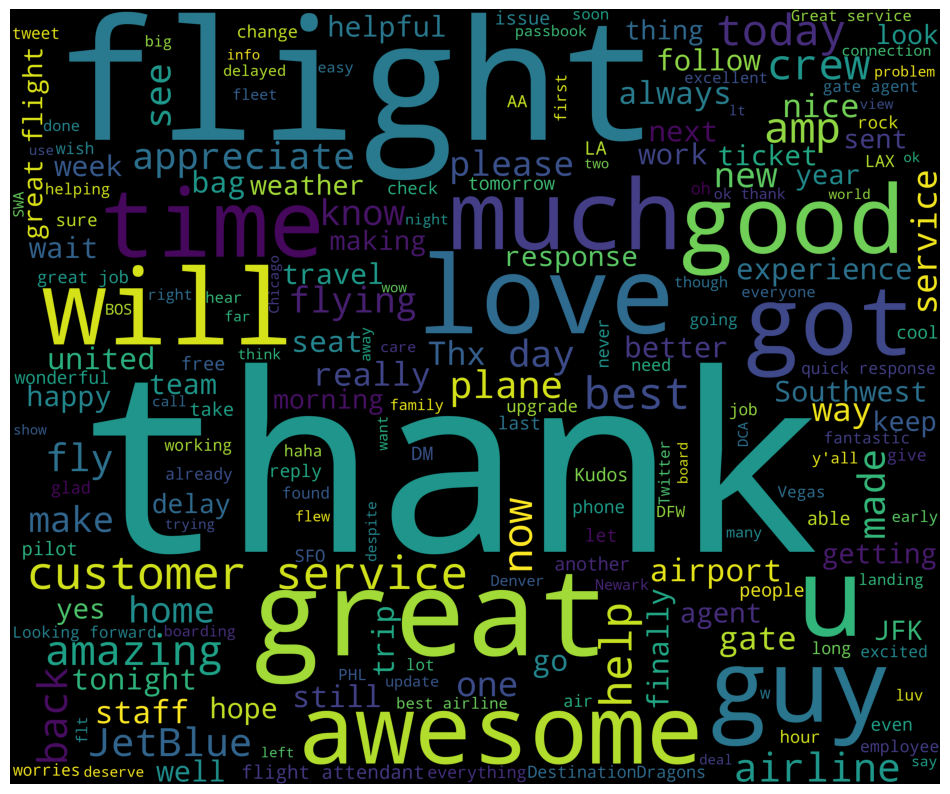

In [51]:
new_df = df[df["airline_sentiment"] == "positive"]
words = " ".join(new_df["text"])
cleaned_word = " ".join([word for word in words.split() if "http" not in word and not word.startswith("@") and word != "RT"])
wordcloud = WordCloud(stopwords = STOPWORDS,
                     background_color = "black", width = 3000, height = 2500).generate(cleaned_word)
plt.figure(figsize = (12, 12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Wordcloud for Negative Reasons

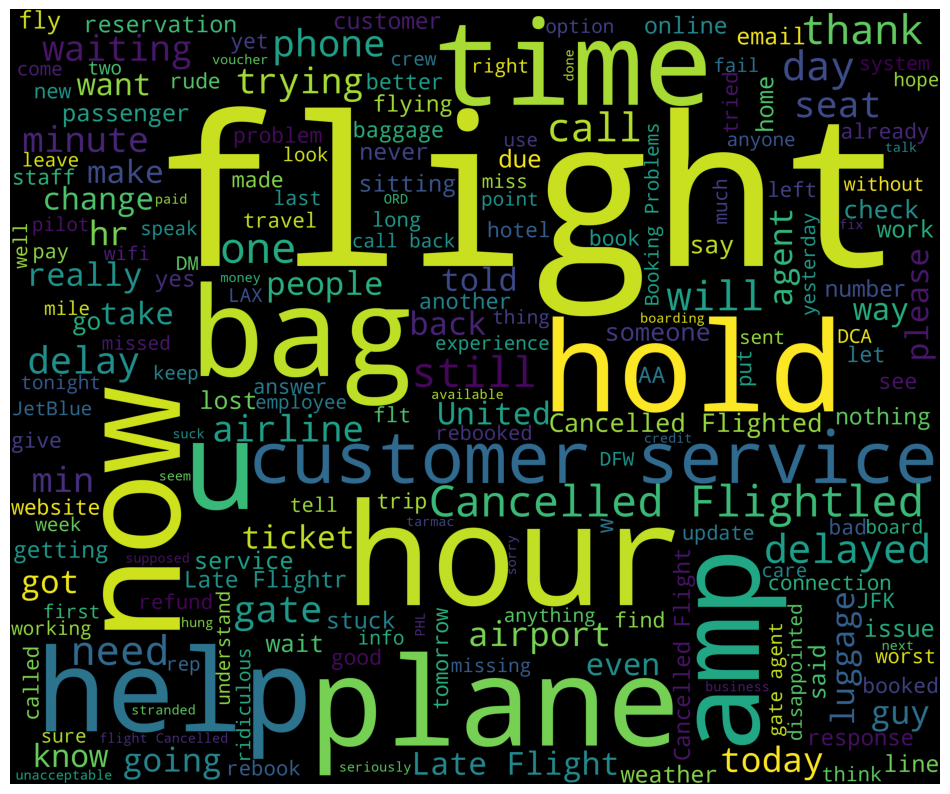

In [53]:
new_df = df[df["airline_sentiment"] == "negative"]
words = " ".join(new_df["text"])
cleaned_word = " ".join([word for word in words.split() if "http" not in word and not word.startswith("@") and word != "RT"])
wordcloud = WordCloud(stopwords = STOPWORDS,
                     background_color = "black", width = 3000, height = 2500).generate(cleaned_word)
plt.figure(figsize = (12, 12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Data Scaling

In [54]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le.fit(df["airline_sentiment"])
df["airline_sentiment_encoded"] = le.transform(df["airline_sentiment"])
df.head()

,airline_sentiment,text,airline_sentiment_encoded
0,neutral,@VirginAmerica What @dhepburn said.,1
1,positive,@VirginAmerica plus you've added commercials t...,2
2,neutral,@VirginAmerica I didn't today... Must mean I n...,1
3,negative,@VirginAmerica it's really aggressive to blast...,0
4,negative,@VirginAmerica and it's a really big bad thing...,0


In [55]:
def tweet_to_words(tweet):
    letters_only = re.sub("[^a-zA-Z]", " ", tweet)
    words = letters_only.lower().split()
    stops = set(stopwords.words("english"))
    meaningful_words = [w for w in words if not w in stops]
    return(" ".join( meaningful_words ))

In [58]:
nltk.download("stopwords")
df["clean_tweet"] = df["text"].apply(lambda x: tweet_to_words(x))

[nltk_data] Downloading package stopwords to

[nltk_data]     C:\Users\moaaz\AppData\Roaming\nltk_data...

[nltk_data]   Package stopwords is already up-to-date!


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>

Int64Index: 14601 entries, 0 to 14639

Data columns (total 4 columns):

 #   Column                     Non-Null Count  Dtype 

---  ------                     --------------  ----- 

 0   airline_sentiment          14601 non-null  object

 1   text                       14601 non-null  object

 2   airline_sentiment_encoded  14601 non-null  int32 

 3   clean_tweet                14601 non-null  object

dtypes: int32(1), object(3)

memory usage: 513.3+ KB


In [61]:
X = df["clean_tweet"]
y = df["airline_sentiment"]

In [62]:
print(X.shape, y.shape)

(14601,) (14601,)


In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [64]:
vect = CountVectorizer()
vect.fit(X_train)

CountVectorizer()

In [65]:
X_train_dtm = vect.transform(X_train)
X_test_dtm = vect.transform(X_test)

### Tuning

In [66]:
vect_tunned = CountVectorizer(stop_words = "english", ngram_range = (1, 2), min_df = 0.1, max_df = 0.7, max_features = 100)
vect_tunned

CountVectorizer(max_df=0.7, max_features=100, min_df=0.1, ngram_range=(1, 2),
                stop_words='english')

### Model Building

In [67]:
from sklearn.svm import SVC
model = SVC(kernel = "linear", random_state = 10)
model.fit(X_train_dtm, y_train)
pred = model.predict(X_test_dtm)

In [69]:
print("Accuracy Score: ", accuracy_score(y_test, pred) * 100)

Accuracy Score:  76.80087647219939


In [70]:
print("Confusion Matrix\n\n", confusion_matrix(y_test, pred))

Confusion Matrix



 [[2000  234   79]

 [ 275  392   80]

 [ 101   78  412]]


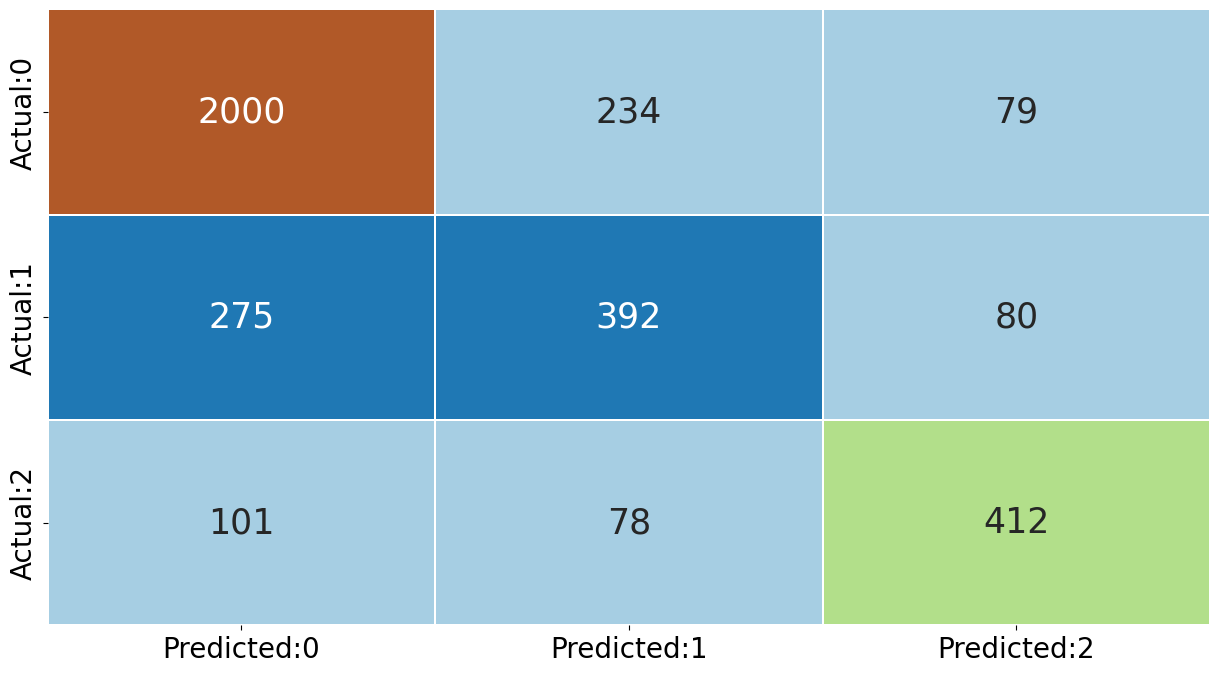

In [76]:
# Assuming that 'y_test' and 'pred' contain labels for a multi-class problem with three classes
conf_matrix = pd.DataFrame(data=confusion_matrix(y_test, pred), columns=['Predicted:0', 'Predicted:1', 'Predicted:2'], index=['Actual:0', 'Actual:1', 'Actual:2'])

# Plot the 3x3 confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Paired', cbar=False, linewidths=0.1, annot_kws={'size': 25})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [77]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support



    negative       0.84      0.86      0.85      2313

     neutral       0.56      0.52      0.54       747

    positive       0.72      0.70      0.71       591



    accuracy                           0.77      3651

   macro avg       0.71      0.70      0.70      3651

weighted avg       0.76      0.77      0.77      3651


